<a href="https://colab.research.google.com/github/Jeeva120720006/True-and-fake-news-production/blob/main/True_and_fake_news_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

In [10]:
import numpy as np
import pandas as pd
#importing libraries for import data

In [11]:
Train=pd.read_csv('/content/train.csv')

In [12]:
Test=pd.read_csv('/content/test.csv')

# Data structure and Content'

In [13]:
Train.shape

(20800, 5)

In [14]:
Test.shape

(5200, 4)

In [15]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [16]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [17]:
Train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [18]:
Test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [19]:
Train.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [20]:
Train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [21]:
Test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


# Text proprocessing

1.remove tha null values

In [22]:
Train =Train.fillna('')

In [23]:
Test = Test.fillna('')

In [24]:
Train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [25]:
Test.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [26]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5200 non-null   object
 2   author  5200 non-null   object
 3   text    5200 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [27]:
Test.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [28]:
Test.describe()

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [29]:
Test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [30]:
Train['subject']=Train['author']+Train['title']

In [31]:
Train.head()

,id,title,author,text,label,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


In [32]:
Test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


# Tokenizotion

In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

True

In [34]:
from nltk.tokenize import word_tokenize
Train['tokens']=Train['subject'].apply(word_tokenize)

In [35]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


3.Lowecasing the text

In [36]:
Train['subject']=Train['subject'].str.lower()

In [37]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: we didn’t even se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy the truth might get you ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed in single u...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


4.Removal of punctuation

In [38]:
Train['subject']=Train['subject'].str.replace('[^\w\s]','')

In [39]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: we didn’t even se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy the truth might get you ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed in single u...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


5.Removal of stop words

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

True

In [41]:
sw=set(nltk.corpus.stopwords.words('english'))
print(sw)

{'them', 'she', 'a', 'but', 'doing', 'too', 'wasn', 'some', 'because', 'below', 'by', "shouldn't", 'while', 'now', 'your', 'mustn', 'most', 'out', 'such', 'few', 'both', 'then', "hasn't", 'y', 'been', "should've", 'which', 'only', "needn't", 'above', 'other', 'don', 'her', 're', 'm', 'here', 'ours', 'weren', 'themselves', 'what', 'and', 'again', 'down', 'it', 'no', 'these', 'won', 'as', 'yourself', 'is', 'through', 'with', "haven't", "she's", 'who', 'didn', 'ma', 'will', 'i', 'having', 'in', 'off', 'll', 'if', "you'll", 'or', 'own', 'during', 'not', 'did', 'should', 'all', "wouldn't", 'mightn', 'there', 'yourselves', 'those', 'haven', "wasn't", 'me', 'hasn', 'we', 'between', 'hadn', 'himself', 'myself', 'their', 'under', 'more', 'o', 'itself', "won't", "you've", 'was', 'had', 'up', 'being', 'after', 'from', 'has', 'into', 'before', 'needn', 'you', 'against', 've', 'the', 'my', 'were', 'herself', "doesn't", 'they', "that'll", 'any', 'to', "hadn't", 'am', 'at', 't', 'once', 'our', "didn'

In [42]:
Train['subject'] = Train['subject'].apply(lambda x: ' '.join([word for word in x.split()]))

In [43]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: we didn’t even se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy the truth might get you ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed in single u...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


6.stemming or lammatization

In [44]:
from nltk.stem import PorterStemmer

In [45]:
Stemmer=PorterStemmer()
Train['subject'] = Train['subject'].apply(lambda x: ' '.join([Stemmer.stem(word) for word in x.split()]))

In [46]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucushous dem aide: we didn’t even see ...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillari clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhi the truth might get you ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilian kill in singl us ai...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jail for fiction u...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


# vectorisation

In [47]:
x=Train['subject']
y=Train['label']

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
Vt=TfidfVectorizer()
Vt.fit(x)

TfidfVectorizer()

In [50]:
x.head()

0    darrel lucushous dem aide: we didn’t even see ...
1    daniel j. flynnflynn: hillari clinton, big wom...
2    consortiumnews.comwhi the truth might get you ...
3    jessica purkiss15 civilian kill in singl us ai...
4    howard portnoyiranian woman jail for fiction u...
Name: subject, dtype: object

TfidfVectorizer()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [51]:
x=Vt.transform(x)

In [52]:
print(x)

  (0, 31242)	0.1863574774470318
  (0, 30374)	0.2707546102284685
  (0, 30026)	0.25210313975340765
  (0, 25963)	0.220477350395657
  (0, 17294)	0.3695850655054227
  (0, 16779)	0.2507422818542645
  (0, 14871)	0.21157595750927563
  (0, 14662)	0.1507253073947597
  (0, 9509)	0.19880506928131383
  (0, 7774)	0.25210313975340765
  (0, 7473)	0.24754918320597402
  (0, 7131)	0.3049769882207795
  (0, 5995)	0.21248887853635495
  (0, 5121)	0.3115512217796373
  (0, 1092)	0.33654503784722767
  (1, 31876)	0.36023732425011556
  (1, 20803)	0.18943225885197656
  (1, 13179)	0.24632164400403173
  (1, 10401)	0.5132110784338103
  (1, 7072)	0.31065322218278363
  (1, 5729)	0.22827762351268144
  (1, 4724)	0.45565340758265516
  (1, 4074)	0.18203654302458683
  (1, 3350)	0.3477227307843711
  (2, 32241)	0.26695467843220716
  :	:
  (20797, 18596)	0.31616664297499275
  (20797, 16272)	0.21985889219778487
  (20797, 14603)	0.12875452251841546
  (20797, 13607)	0.29465797939837285
  (20797, 7259)	0.20564133402578771
  (20797

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import classification_report

In [55]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [56]:
Model=LogisticRegression()

In [57]:
Model.fit(xTrain,yTrain)

LogisticRegression()

LogisticRegression()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [58]:
ytrpredict=Model.predict(xTrain)

In [59]:
accuracy=accuracy_score(yTrain,ytrpredict)
precision=precision_score(yTrain,ytrpredict)
recall=recall_score(yTrain,ytrpredict)
f1=f1_score(yTrain,ytrpredict)

print('Training Accuracy:',accuracy)
print('Training Precision:',precision)
print('Training Recall:',recall)
print('Training F1 Score:',f1)

Training Accuracy: 0.9716346153846154
Training Precision: 0.9518169273229071
Training Recall: 0.9936374549819929
Training F1 Score: 0.972277692940209


In [60]:
accuracy=accuracy_score(yTrain,ytrpredict)
precision=precision_score(yTrain,ytrpredict)
recall=recall_score(yTrain,ytrpredict)
f1=f1_score(yTrain,ytrpredict)

print('Training Accuracy:',accuracy)
print('Training Precision:',precision)
print('Training Recall:',recall)
print('Training F1 Score:',f1)

Training Accuracy: 0.9716346153846154
Training Precision: 0.9518169273229071
Training Recall: 0.9936374549819929
Training F1 Score: 0.972277692940209


In [61]:
Yttpredict=Model.predict(xTest)

In [62]:
accuracy =accuracy_score(yTest,Yttpredict)
precision = precision_score(yTest, Yttpredict)
recall = recall_score(yTest, Yttpredict)
f1 = f1_score(yTest, Yttpredict)

print(' Testing Accuracy:', accuracy)
print(' Testing Precision:', precision)
print(' Testing Recall:', recall)
print('Testing F1 Score:',f1)

 Testing Accuracy: 0.9497596153846154
 Testing Precision: 0.9160746003552398
 Testing Recall: 0.9903984637542007
Testing F1 Score: 0.9517877739331027


In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

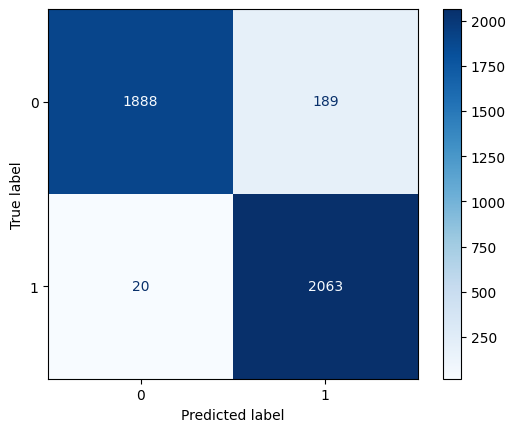

In [64]:
cm = confusion_matrix(yTest,Yttpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

Saving the model

In [65]:
import pickle
# Import the pickle module for serializing and deserializing Python object

SUMMARY:

*In this project true and fake prediction ,we started with mounding thr datasets from the drive and imported the required libraries for the project.

*Then we used the explored the train and tset datasets by using numpy and pandas libraries. *Then we checked for the null values using a library called isnull().

*We used shape library to identify how many rows and columns are there in a dataset.

*Removed null values from the dataset using fillna().

*Tokenizing the 'subject'column in train and test dataset and storing the result in a new 'token' column.

*Lowered the cases for 'subject' column in train dataset.

*Removed the punctuations and stopwords from the 'subject' coulomn.

*We did stemming,lammatization and vectorization.

*In conclusion we saved the model using pickle library.